In [8]:
import pandas as pd
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('sensors_201206.csv', sep='|')

In [10]:
df

,CONFIG_ID,"TO_CHAR(DATE_AND_TIME,'MM/DD/YYYY')",LINK_ID,LAT,LONGI,DIRECTION,ONSTREET,POSTMILE
0,29,06/05/2012,715898,-118.021304,33.879966,1,I-5,0.71
1,30,06/07/2012,715898,-118.021304,33.879966,1,I-5,0.71
2,31,06/09/2012,715898,-118.021304,33.879966,1,I-5,0.71
3,32,06/16/2012,715898,-118.021304,33.879966,1,I-5,0.71
4,33,06/27/2012,715898,-118.021304,33.879966,1,I-5,0.71
...,...,...,...,...,...,...,...,...
23427,33,06/27/2012,1217490,-117.883314,33.910511,0,57,21.35
23428,34,06/29/2012,1217490,-117.883314,33.910511,0,57,21.35
23429,33,06/27/2012,1217669,0.000000,0.000000,1,405,20.65
23430,34,06/29/2012,1217669,0.000000,0.000000,1,405,20.65


In [11]:
df = df[df.LAT != 0]

In [12]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.LAT, df.LONGI))

In [13]:
gdf

,CONFIG_ID,"TO_CHAR(DATE_AND_TIME,'MM/DD/YYYY')",LINK_ID,LAT,LONGI,DIRECTION,ONSTREET,POSTMILE,geometry
0,29,06/05/2012,715898,-118.021304,33.879966,1,I-5,0.71,POINT (-118.02130 33.87997)
1,30,06/07/2012,715898,-118.021304,33.879966,1,I-5,0.71,POINT (-118.02130 33.87997)
2,31,06/09/2012,715898,-118.021304,33.879966,1,I-5,0.71,POINT (-118.02130 33.87997)
3,32,06/16/2012,715898,-118.021304,33.879966,1,I-5,0.71,POINT (-118.02130 33.87997)
4,33,06/27/2012,715898,-118.021304,33.879966,1,I-5,0.71,POINT (-118.02130 33.87997)
...,...,...,...,...,...,...,...,...,...
23425,31,06/09/2012,1217490,-117.883314,33.910511,0,57,21.35,POINT (-117.88331 33.91051)
23426,32,06/16/2012,1217490,-117.883314,33.910511,0,57,21.35,POINT (-117.88331 33.91051)
23427,33,06/27/2012,1217490,-117.883314,33.910511,0,57,21.35,POINT (-117.88331 33.91051)
23428,34,06/29/2012,1217490,-117.883314,33.910511,0,57,21.35,POINT (-117.88331 33.91051)


In [14]:
gdf = gdf.set_crs(epsg=4326)
gdf = gdf.to_crs(epsg=3857)

In [15]:
gdf

,CONFIG_ID,"TO_CHAR(DATE_AND_TIME,'MM/DD/YYYY')",LINK_ID,LAT,LONGI,DIRECTION,ONSTREET,POSTMILE,geometry
0,29,06/05/2012,715898,-118.021304,33.879966,1,I-5,0.71,POINT (-13138071.464 4012695.758)
1,30,06/07/2012,715898,-118.021304,33.879966,1,I-5,0.71,POINT (-13138071.464 4012695.758)
2,31,06/09/2012,715898,-118.021304,33.879966,1,I-5,0.71,POINT (-13138071.464 4012695.758)
3,32,06/16/2012,715898,-118.021304,33.879966,1,I-5,0.71,POINT (-13138071.464 4012695.758)
4,33,06/27/2012,715898,-118.021304,33.879966,1,I-5,0.71,POINT (-13138071.464 4012695.758)
...,...,...,...,...,...,...,...,...,...
23425,31,06/09/2012,1217490,-117.883314,33.910511,0,57,21.35,POINT (-13122710.488 4016792.160)
23426,32,06/16/2012,1217490,-117.883314,33.910511,0,57,21.35,POINT (-13122710.488 4016792.160)
23427,33,06/27/2012,1217490,-117.883314,33.910511,0,57,21.35,POINT (-13122710.488 4016792.160)
23428,34,06/29/2012,1217490,-117.883314,33.910511,0,57,21.35,POINT (-13122710.488 4016792.160)


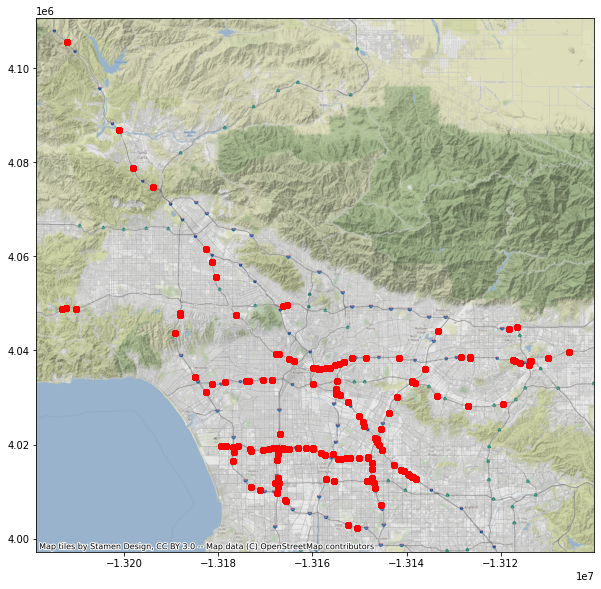

In [38]:
fig, ax = plt.subplots(1, figsize=(10,10))
gdf[:1000].plot(ax=ax, color='red')
cx.add_basemap(ax, zoom=12)

In [46]:
long_max = df.LAT.max()
long_min = df.LAT.min()
lat_max = df.LONGI.max()
lat_min = df.LONGI.min()

QUESTIONS:

2 Sensors are placed in 0,0 that seems like an error

How do we determine which direttion is which?

What is the significance of each observations here? Multiple of the same sensor means what?

What is CONFIG_ID? What is LINK_ID?

Sensors are around LA so seems simillar to the METR LA area

# Sensors

In [47]:
df2 = pd.read_csv('events_201206_new.csv', sep='|')

In [48]:
df2

,EVENTID,LAT,LONGI,"TO_CHAR(STTIME,'YYYYMMDDHH24:MI')",ONSTREET_PENNY,DIRECTION,ADMINCITY,DESCRIPTION,AFFECTEDLANECNT,EVENT_STATUS
0,13,33.917426,-117.927353,20120601 01:01,BONITA,130,Orange County Communications Center,1125 - Traffic Hazard,0,2
1,14,33.917422,-117.933006,20120601 01:02,IMPERIAL,130,Orange County Communications Center,1125 - Traffic Hazard,0,2
2,14,34.121471,-117.513667,20120605 01:11,I15,0,Inland Communications Center,CLOSURE - Closure of a Road,0,2
3,15,33.730247,-117.989257,20120606 01:24,EDINGER,130,Orange County Communications Center,1179 - Traffic Collision - 1141 Rolling,0,2
4,16,34.024961,-117.729588,20120605 01:19,SR60,2,Rancho Cucamonga,1125 - Traffic Hazard,0,2
...,...,...,...,...,...,...,...,...,...,...
28041,121028,34.152512,-118.467770,20120630 14:23,I405,0,LOS ANGELES,Accident 405 N @ SEPULVEDA 3 Left lane(s) bloc...,2,2
28042,121029,34.289836,-118.409889,20120630 14:36,I210,2,LOS ANGELES,Accident 210 E @ SR 118 2 Right lane(s) blocke...,2,2
28043,121030,34.143278,-118.187108,20120630 17:12,SR134,2,LOS ANGELES,Accident 134 E @ FIGUEROA ST 1 Right lane(s) b...,1,2
28044,121031,33.993246,-118.403709,20120630 17:35,I405,1,LOS ANGELES,Accident 405 S @ BRADDOCK DR CARPOOL lane(s) b...,1,2


In [61]:
df2 = df2[df2.LAT.between(lat_min, lat_max)]

In [63]:

df2 = df2[df2.LONGI.between(long_min, long_max)]

In [64]:

gdf2 = gpd.GeoDataFrame(
    df2, geometry=gpd.points_from_xy(df2.LONGI, df2.LAT))

In [65]:
gdf2

,EVENTID,LAT,LONGI,"TO_CHAR(STTIME,'YYYYMMDDHH24:MI')",ONSTREET_PENNY,DIRECTION,ADMINCITY,DESCRIPTION,AFFECTEDLANECNT,EVENT_STATUS,geometry
0,13,33.917426,-117.927353,20120601 01:01,BONITA,130,Orange County Communications Center,1125 - Traffic Hazard,0,2,POINT (-117.92735 33.91743)
1,14,33.917422,-117.933006,20120601 01:02,IMPERIAL,130,Orange County Communications Center,1125 - Traffic Hazard,0,2,POINT (-117.93301 33.91742)
2,14,34.121471,-117.513667,20120605 01:11,I15,0,Inland Communications Center,CLOSURE - Closure of a Road,0,2,POINT (-117.51367 34.12147)
3,15,33.730247,-117.989257,20120606 01:24,EDINGER,130,Orange County Communications Center,1179 - Traffic Collision - 1141 Rolling,0,2,POINT (-117.98926 33.73025)
4,16,34.024961,-117.729588,20120605 01:19,SR60,2,Rancho Cucamonga,1125 - Traffic Hazard,0,2,POINT (-117.72959 34.02496)
...,...,...,...,...,...,...,...,...,...,...,...
28041,121028,34.152512,-118.467770,20120630 14:23,I405,0,LOS ANGELES,Accident 405 N @ SEPULVEDA 3 Left lane(s) bloc...,2,2,POINT (-118.46777 34.15251)
28042,121029,34.289836,-118.409889,20120630 14:36,I210,2,LOS ANGELES,Accident 210 E @ SR 118 2 Right lane(s) blocke...,2,2,POINT (-118.40989 34.28984)
28043,121030,34.143278,-118.187108,20120630 17:12,SR134,2,LOS ANGELES,Accident 134 E @ FIGUEROA ST 1 Right lane(s) b...,1,2,POINT (-118.18711 34.14328)
28044,121031,33.993246,-118.403709,20120630 17:35,I405,1,LOS ANGELES,Accident 405 S @ BRADDOCK DR CARPOOL lane(s) b...,1,2,POINT (-118.40371 33.99325)


In [66]:

gdf2 = gdf2.set_crs(epsg=4326)
gdf2 = gdf2.to_crs(epsg=3857)

In [67]:
gdf2

,EVENTID,LAT,LONGI,"TO_CHAR(STTIME,'YYYYMMDDHH24:MI')",ONSTREET_PENNY,DIRECTION,ADMINCITY,DESCRIPTION,AFFECTEDLANECNT,EVENT_STATUS,geometry
0,13,33.917426,-117.927353,20120601 01:01,BONITA,130,Orange County Communications Center,1125 - Traffic Hazard,0,2,POINT (-13127612.887 4017719.737)
1,14,33.917422,-117.933006,20120601 01:02,IMPERIAL,130,Orange County Communications Center,1125 - Traffic Hazard,0,2,POINT (-13128242.176 4017719.201)
2,14,34.121471,-117.513667,20120605 01:11,I15,0,Inland Communications Center,CLOSURE - Closure of a Road,0,2,POINT (-13081561.572 4045124.299)
3,15,33.730247,-117.989257,20120606 01:24,EDINGER,130,Orange County Communications Center,1179 - Traffic Collision - 1141 Rolling,0,2,POINT (-13134504.008 3992638.047)
4,16,34.024961,-117.729588,20120605 01:19,SR60,2,Rancho Cucamonga,1125 - Traffic Hazard,0,2,POINT (-13105597.787 4032154.171)
...,...,...,...,...,...,...,...,...,...,...,...
28041,121028,34.152512,-118.467770,20120630 14:23,I405,0,LOS ANGELES,Accident 405 N @ SEPULVEDA 3 Left lane(s) bloc...,2,2,POINT (-13187771.832 4049299.092)
28042,121029,34.289836,-118.409889,20120630 14:36,I210,2,LOS ANGELES,Accident 210 E @ SR 118 2 Right lane(s) blocke...,2,2,POINT (-13181328.548 4067786.633)
28043,121030,34.143278,-118.187108,20120630 17:12,SR134,2,LOS ANGELES,Accident 134 E @ FIGUEROA ST 1 Right lane(s) b...,1,2,POINT (-13156528.681 4048057.025)
28044,121031,33.993246,-118.403709,20120630 17:35,I405,1,LOS ANGELES,Accident 405 S @ BRADDOCK DR CARPOOL lane(s) b...,1,2,POINT (-13180640.594 4027895.165)


<AxesSubplot:>

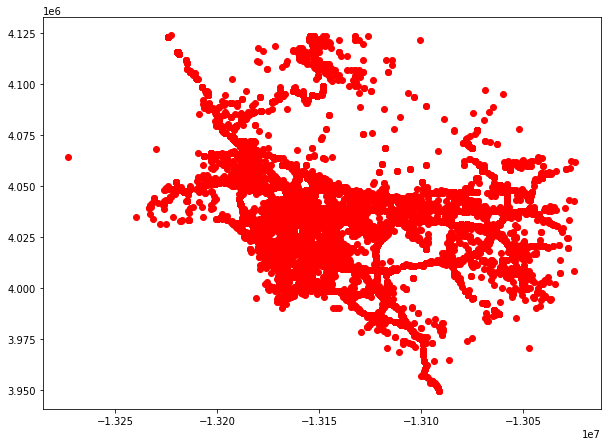

In [69]:

fig, ax = plt.subplots(1, figsize=(10,10))
gdf2[:].plot(ax=ax, color='red')
#cx.add_basemap(ax, zoom=12)